###Подготовка датасета

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [15]:
dataset = pd.read_csv('/content/data.csv')
dataset.head()

,Gender,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Sleep Disorder,mmAge,mmPhysical Activity Level,mmHeart Rate,mmDaily Steps
0,1.0,6.1,6,6,1.0,1.0,0.00000,0.2,0.571429,0.171429
1,1.0,6.2,6,8,0.0,1.0,0.03125,0.5,0.476190,1.000000
2,1.0,6.2,6,8,0.0,1.0,0.03125,0.5,0.476190,1.000000
3,1.0,5.9,4,8,1.0,0.0,0.03125,0.0,0.952381,0.000000
4,1.0,5.9,4,8,1.0,0.0,0.03125,0.0,0.952381,0.000000


In [16]:
dataset['Stress Level'] = dataset['Stress Level'].map({3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5})

In [17]:
vals = dataset["Stress Level"].unique()
vals

array([3, 5, 4, 1, 0, 2])

In [18]:
cols_for_clusters = ['Gender', 'mmAge', 'Sleep Duration','Quality of Sleep', 'mmPhysical Activity Level', 'Sleep Disorder', 'BMI Category', 'mmHeart Rate', 'mmDaily Steps']

df= dataset[cols_for_clusters].copy()

In [19]:
df.head()

,Gender,mmAge,Sleep Duration,Quality of Sleep,mmPhysical Activity Level,Sleep Disorder,BMI Category,mmHeart Rate,mmDaily Steps
0,1.0,0.00000,6.1,6,0.2,1.0,1.0,0.571429,0.171429
1,1.0,0.03125,6.2,6,0.5,1.0,0.0,0.476190,1.000000
2,1.0,0.03125,6.2,6,0.5,1.0,0.0,0.476190,1.000000
3,1.0,0.03125,5.9,4,0.0,0.0,1.0,0.952381,0.000000
4,1.0,0.03125,5.9,4,0.0,0.0,1.0,0.952381,0.000000


In [20]:
X = df
y = dataset["Stress Level"]

###Метод главных компонентов (Principal Component Analysis, PCA)

In [21]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

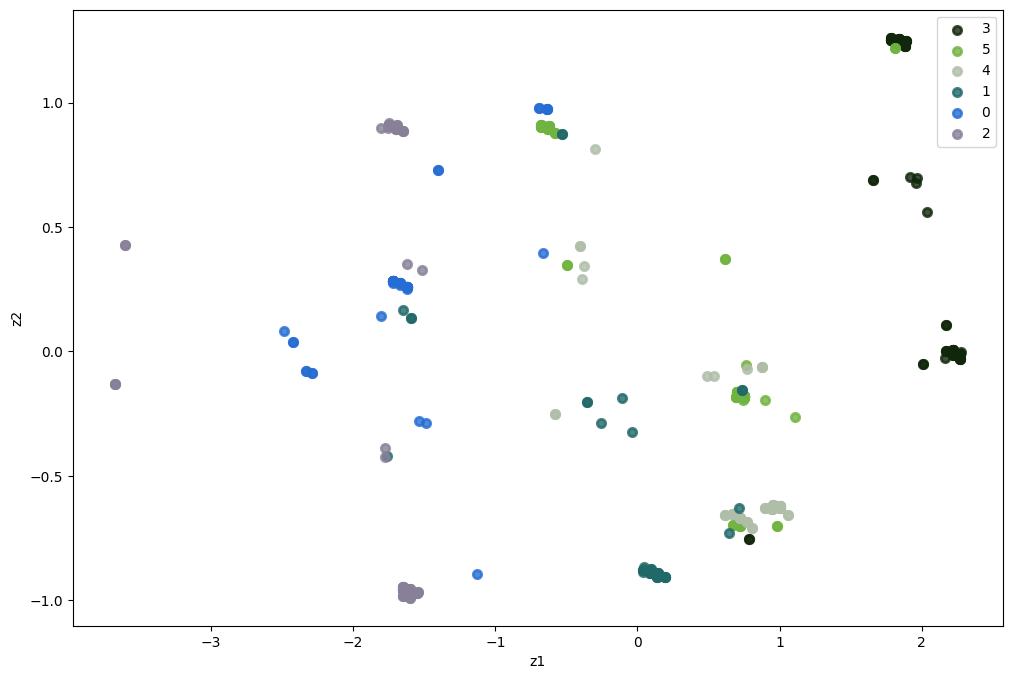

In [66]:
pca = PCA(n_components=4)
X_new = pca.fit(X).transform(X)

plt.figure(figsize=(12,8))
colors = ['#11270b', '#71b340', '#b0bea9', '#216869', '#266dd3', '#888098']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [23]:
pca.explained_variance_ratio_

array([0.67222373, 0.16511005])

### Независимый анализ компонентов (Independent Component Analysis, ICA)

In [24]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

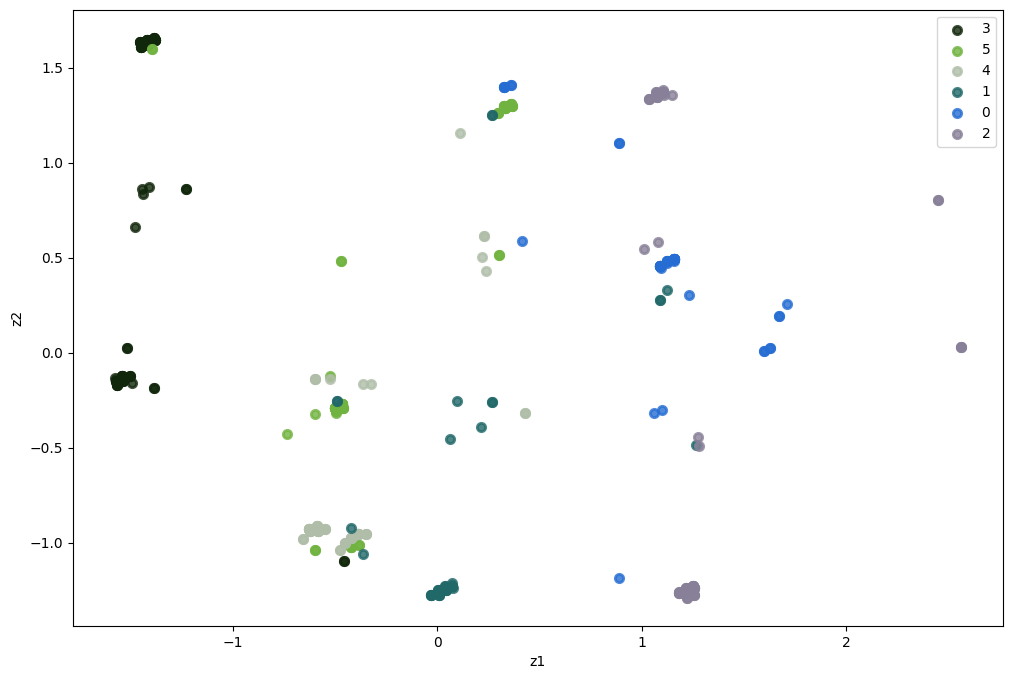

In [25]:
plt.figure(figsize=(12,8))
colors = ['#11270b', '#71b340', '#b0bea9', '#216869', '#266dd3', '#888098']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

### Kernel PCA

In [65]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

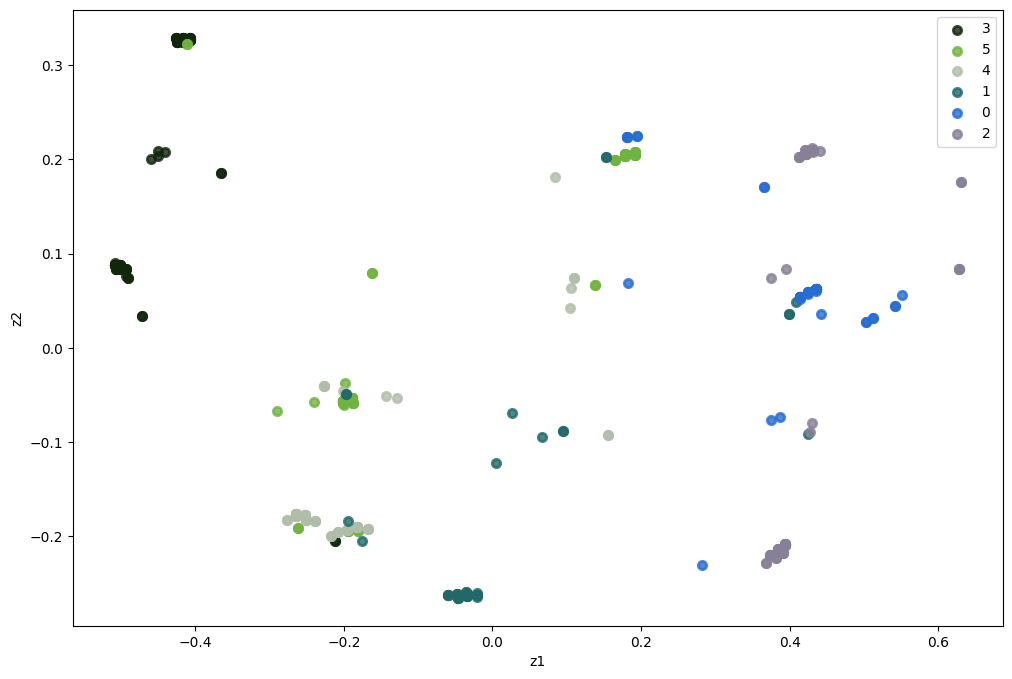

In [64]:
plt.figure(figsize=(12,8))
colors = ['#11270b', '#71b340', '#b0bea9', '#216869', '#266dd3', '#888098']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

### tSNE

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [29]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (374, 9)
New Shape of X:  (374, 2)
Kullback-Leibler divergence after optimization:  -0.05982029065489769
No. of iterations:  999


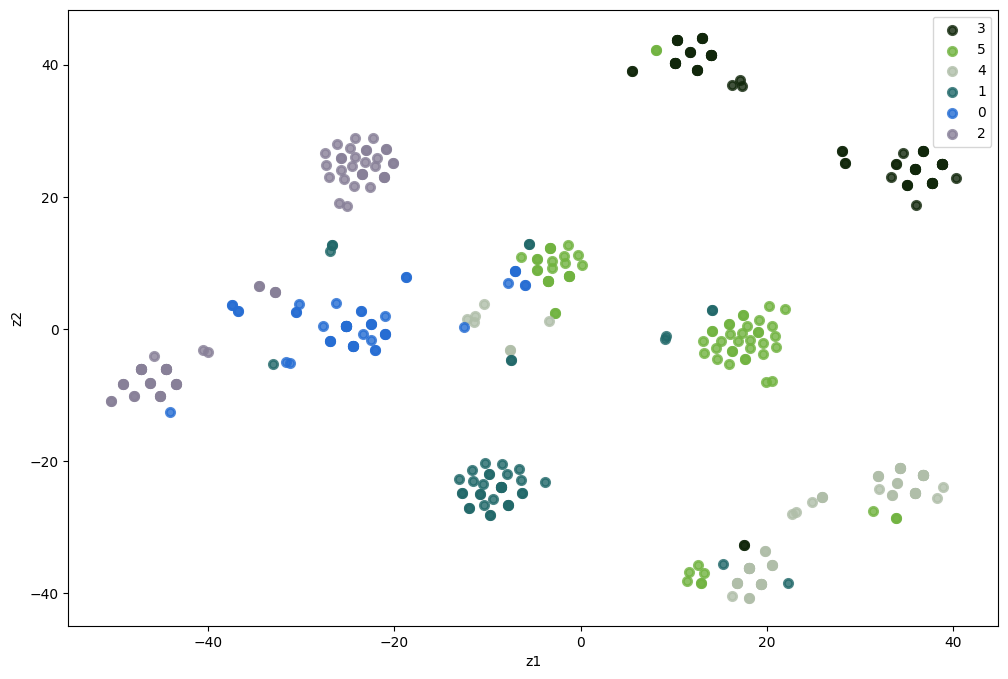

In [30]:
plt.figure(figsize=(12,8))
colors = ['#11270b', '#71b340', '#b0bea9', '#216869', '#266dd3', '#888098']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

### Поиск выбросов. DBSCAN

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [82]:
dbscan_cluster1 = DBSCAN(eps = 0.2, min_samples = 9)
dbscan_cluster1.fit(X)

DBSCAN(eps=0.2, min_samples=9)

In [83]:
# Number of Clusters
labels=dbscan_cluster1.labels_

N_clus=len(set(labels))-(1 if -1 in labels else 0)
print(f'Estimated no. of clusters: {N_clus}')

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print(f'Estimated no. of noise points: {n_noise}')

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 10
Estimated no. of noise points: 93
v_measure = 0.6571790414720842


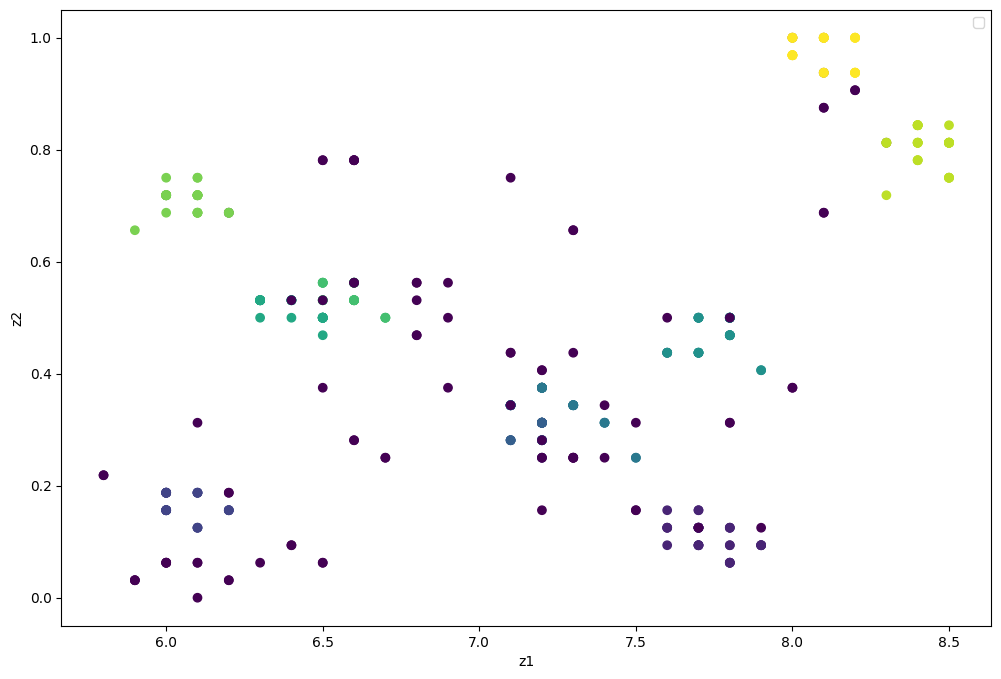

In [84]:
plt.figure(figsize=(12,8))
lw = 2

plt.scatter(
        X['Sleep Duration'], X['mmAge'],c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [102]:
from sklearn.neighbors import NearestNeighbors

min_samples = 9

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [103]:
import sklearn

sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

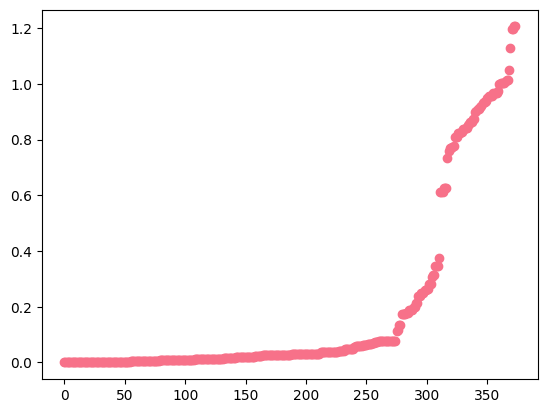

In [104]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

In [105]:
dbscan = DBSCAN(eps = 0.1, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=0.1, min_samples=9)


In [106]:
pred = dbscan.fit_predict(X)

In [107]:
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 12
Estimated no. of noise points: 133
v_measure = 0.5779661910947915


In [108]:
anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

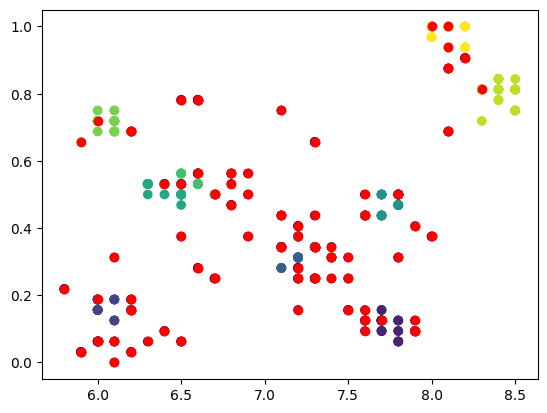

In [109]:
plt.scatter( X['Sleep Duration'], X['mmAge'],c=dbscan_cluster1.labels_)
plt.scatter(values['Sleep Duration'], values['mmAge'], color='r')
plt.show()